<a href="https://colab.research.google.com/github/BelikMary/Electronic_content_development/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Обработка первой статьи**

Это [облако тегов №1](https://wordart.com/ebu00yw9i2y7/%D0%BE%D0%B4%D0%BD%D0%B0%D1%81%D1%81%D1%8B%D0%BB%D0%BA%D0%B0%D0%B0_%D0%BF%D1%80%D0%BE%D1%84%D0%B0%D0%B9%D0%BB%D0%B8%D0%BD%D0%B3-%D0%B2%20%D0%BC%D0%B0%D1%80%D0%BA%D0%B5%D1%82%D0%B8%D0%BD%D0%B3%D0%B5%20%D0%B8%20%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6%D0%B0%D1%85_%D0%B1%D0%B5%D0%BB%D0%B8%D0%BA%D0%BC%D0%BA)

*Предобработка текста*

In [ ]:
#открываем файл
f = open('marketing.txt', "r", encoding="utf-8")
text = f.read()

In [ ]:
#подсчет длины текста
len(text)

7875

In [ ]:
#перевод символов в единый регистр
text = text.lower()

In [ ]:
#очистка текста от знаков пунктуации
import string

spec_chars = string.punctuation + '\n\xa0\t—…()'

def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

text = remove_chars_from_text(text, spec_chars)
text = remove_chars_from_text(text, string.digits)

In [ ]:
#проверка, что текст отчищен
text

'в наше время в эпоху digital и активных онлайнпродаж всё сложнее становиться заинтересовать покупателя приобрести товар или услугу сммспециалисты маркетологи таргетологи сегментируют покупателей основываясь на социальнодемографических параметрах пол возраст место проживания увлечения доход и др при этом как показывает практика этот метод не учитывает индивидуальных психологических особенностей покупателей а ведь среди клиентов одного поколения и с   равным доходом бывают разные потребители  поразному подходят к процессу выбора товара или услуги и  учитывают его разные характеристики для более точной сегментации покупателей по жизненным ценностям большинство известных брендов   как  используют классификацию основанную на сегментировании клиентов по психотипам среди   используется методика профайлинг   типов личности  или  радикалов  профайлинг  англ  profile   профиль   совокупность психологических методов оценки и прогнозирования поведения человека на основе анализа поведенческих особ

*Токенизация текста*

Для последующей обработки очищенный текст необходимо разбить на составные части – токены. В анализе текста на естественном языке применяется разбиение на символы, слова и предложения. Процесс разбиения называется токенизация. Для нашей задачи частотного анализа необходимо разбить текст на слова.

In [ ]:
text_token=text.split()

In [ ]:
len(text_token)

964

In [ ]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [ ]:
from nltk import word_tokenize
text_tokens = word_tokenize(text)

In [ ]:
#получение длины списка токенов
len(text_tokens)

964

In [ ]:
#Для применения инструментов частотного анализа библиотеки NLTK необходимо список токенов преобразовать к классу Text, который входит в эту библиотеку:
import nltk
text = nltk.Text(text_tokens)

In [ ]:
print(type(text))

<class 'nltk.text.Text'>


*Подсчёт статистики встречаемости слов в тексте*

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(text_tokens)

In [ ]:
fdist

FreqDist({'и': 60, 'в': 23, 'для': 16, 'тип': 15, 'на': 13, 'профайлинг': 13, 'к': 12, 'типа': 12, 'или': 10, 'они': 10, ...})

Сейчас самыми частыми словами являются союзы, предлоги и т.д., это надо исправить!

*Удаление стоп-слов*

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words("russian")

In [ ]:
filtered_tokens = [word for word in text_tokens if word not in stop_words]

print(filtered_tokens)

['наше', 'время', 'эпоху', 'digital', 'активных', 'онлайнпродаж', 'всё', 'сложнее', 'становиться', 'заинтересовать', 'покупателя', 'приобрести', 'товар', 'услугу', 'сммспециалисты', 'маркетологи', 'таргетологи', 'сегментируют', 'покупателей', 'основываясь', 'социальнодемографических', 'параметрах', 'пол', 'возраст', 'место', 'проживания', 'увлечения', 'доход', 'др', 'показывает', 'практика', 'метод', 'учитывает', 'индивидуальных', 'психологических', 'особенностей', 'покупателей', 'среди', 'клиентов', 'одного', 'поколения', 'равным', 'доходом', 'бывают', 'разные', 'потребители', 'поразному', 'подходят', 'процессу', 'выбора', 'товара', 'услуги', 'учитывают', 'разные', 'характеристики', 'точной', 'сегментации', 'покупателей', 'жизненным', 'ценностям', 'большинство', 'известных', 'брендов', 'используют', 'классификацию', 'основанную', 'сегментировании', 'клиентов', 'психотипам', 'среди', 'используется', 'методика', 'профайлинг', 'типов', 'личности', 'радикалов', 'профайлинг', 'англ', 'prof

*Выделение корня слова*

Т.к. слова могут иметь разное окончание, то для чистоты эксперимента выделим корень слова

In [ ]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("russian")

lemmatized_words = [stemmer.stem(word) for word in filtered_tokens]
print(lemmatized_words)

['наш', 'врем', 'эпох', 'digital', 'активн', 'онлайнпродаж', 'все', 'сложн', 'станов', 'заинтересова', 'покупател', 'приобрест', 'товар', 'услуг', 'сммспециалист', 'маркетолог', 'таргетолог', 'сегментир', 'покупател', 'основыв', 'социальнодемографическ', 'параметр', 'пол', 'возраст', 'мест', 'проживан', 'увлечен', 'доход', 'др', 'показыва', 'практик', 'метод', 'учитыва', 'индивидуальн', 'психологическ', 'особен', 'покупател', 'сред', 'клиент', 'одн', 'поколен', 'равн', 'доход', 'быва', 'разн', 'потребител', 'поразн', 'подход', 'процесс', 'выбор', 'товар', 'услуг', 'учитыва', 'разн', 'характеристик', 'точн', 'сегментац', 'покупател', 'жизнен', 'ценност', 'большинств', 'известн', 'бренд', 'использ', 'классификац', 'основа', 'сегментирован', 'клиент', 'психотип', 'сред', 'использ', 'методик', 'профайлинг', 'тип', 'личност', 'радикал', 'профайлинг', 'англ', 'profile', 'профил', 'совокупн', 'психологическ', 'метод', 'оценк', 'прогнозирован', 'поведен', 'человек', 'основ', 'анализ', 'поведен

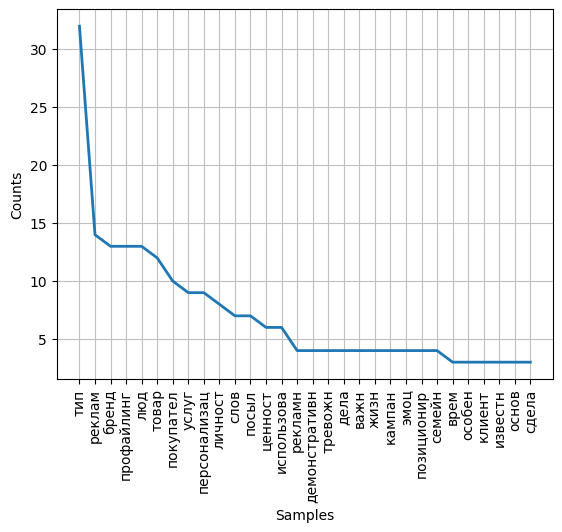

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist = FreqDist(lemmatized_words)
fdist.plot(30,cumulative=False)

# **Обработка второй статьи**

Это [облако тегов №2](https://wordart.com/scuw9sruv5mp/%D0%BE%D0%B4%D0%BD%D0%B0-%D1%81%D1%81%D1%8B%D0%BB%D0%BA%D0%B0_%D0%BF%D1%80%D0%BE%D1%84%D0%B0%D0%B9%D0%BB%D0%B8%D0%BD%D0%B3%20%D0%B2%20hr_%D0%B1%D0%B5%D0%BB%D0%B8%D0%BA%D0%BC%D0%BA)

In [135]:
#открываем файл
d = open('hr.txt', "r", encoding="utf-8")
text2 = d.read()

In [136]:
#подсчет длины текста
len(text2)

6302

In [137]:
#перевод символов в единый регистр
text2 = text2.lower()

In [138]:
#очистка текста от знаков пунктуации
import string

spec_chars = string.punctuation + '\n\xa0\t—…()–'

def remove_chars_from_text2(text2, chars):
    return "".join([ch for ch in text2 if ch not in chars])

text2 = remove_chars_from_text2(text2, spec_chars)
text2 = remove_chars_from_text2(text2, string.digits)

In [139]:
#проверка, что текст отчищен
text2

'профайлинг в hr принципы и эффективность метода  профайлинг   техника визуального распознавания психотипа человека изначально термин  профайлинг  употреблялся в контексте составления поискового психологического портрета профиля неизвестного лица по следам на месте преступления при поиске сотрудника техника профайлинга может быть успешно и продуктивно применима считает филипп штурмин  управляющий партнер bb airwaves cg эксперт по профайлингу и организационной психологии клинический психолог как в классическом расследовании нельзя на  полагаться на психологический портрет или даже фоторобот   и в подборе или формировании команды техника профайлинга не может гарантировать  результата профайлинг необходим в  случаях   важно существенно повысить вероятность успеха  эффективность метода профайлинга определяется соблюдением нескольких критериев правильного методологического подхода к работе с персоналом на первом этапе ключевым фактором является определение типа руководителя в общей системе 

In [140]:
#токенизация текста
from nltk import word_tokenize
text2_tokens = word_tokenize(text2)

In [141]:
#получение длины списка токенов
len(text2_tokens)

741

In [142]:
#Для применения инструментов частотного анализа библиотеки NLTK необходимо список токенов преобразовать к классу Text, который входит в эту библиотеку:
import nltk
text2 = nltk.Text(text2_tokens)

In [143]:
#удаление стоп-слов
filtered_tokens2 = [word for word in text2_tokens if word not in stop_words]

print(filtered_tokens2)

['профайлинг', 'hr', 'принципы', 'эффективность', 'метода', 'профайлинг', 'техника', 'визуального', 'распознавания', 'психотипа', 'человека', 'изначально', 'термин', 'профайлинг', 'употреблялся', 'контексте', 'составления', 'поискового', 'психологического', 'портрета', 'профиля', 'неизвестного', 'лица', 'следам', 'месте', 'преступления', 'поиске', 'сотрудника', 'техника', 'профайлинга', 'успешно', 'продуктивно', 'применима', 'считает', 'филипп', 'штурмин', 'управляющий', 'партнер', 'bb', 'airwaves', 'cg', 'эксперт', 'профайлингу', 'организационной', 'психологии', 'клинический', 'психолог', 'классическом', 'расследовании', 'полагаться', 'психологический', 'портрет', 'фоторобот', 'подборе', 'формировании', 'команды', 'техника', 'профайлинга', 'гарантировать', 'результата', 'профайлинг', 'необходим', 'случаях', 'важно', 'существенно', 'повысить', 'вероятность', 'успеха', 'эффективность', 'метода', 'профайлинга', 'определяется', 'соблюдением', 'нескольких', 'критериев', 'правильного', 'мет

In [144]:
#выделение корня слова
lemmatized_words2 = [stemmer.stem(word) for word in filtered_tokens2]
print(lemmatized_words2)

['профайлинг', 'hr', 'принцип', 'эффективн', 'метод', 'профайлинг', 'техник', 'визуальн', 'распознаван', 'психотип', 'человек', 'изначальн', 'термин', 'профайлинг', 'употребля', 'контекст', 'составлен', 'поисков', 'психологическ', 'портрет', 'профил', 'неизвестн', 'лиц', 'след', 'мест', 'преступлен', 'поиск', 'сотрудник', 'техник', 'профайлинг', 'успешн', 'продуктивн', 'применим', 'счита', 'филипп', 'штурмин', 'управля', 'партнер', 'bb', 'airwaves', 'cg', 'эксперт', 'профайлинг', 'организацион', 'психолог', 'клиническ', 'психолог', 'классическ', 'расследован', 'полага', 'психологическ', 'портрет', 'фоторобот', 'подбор', 'формирован', 'команд', 'техник', 'профайлинг', 'гарантирова', 'результат', 'профайлинг', 'необход', 'случа', 'важн', 'существен', 'повыс', 'вероятн', 'успех', 'эффективн', 'метод', 'профайлинг', 'определя', 'соблюден', 'нескольк', 'критер', 'правильн', 'методологическ', 'подход', 'работ', 'персонал', 'перв', 'этап', 'ключев', 'фактор', 'явля', 'определен', 'тип', 'руко

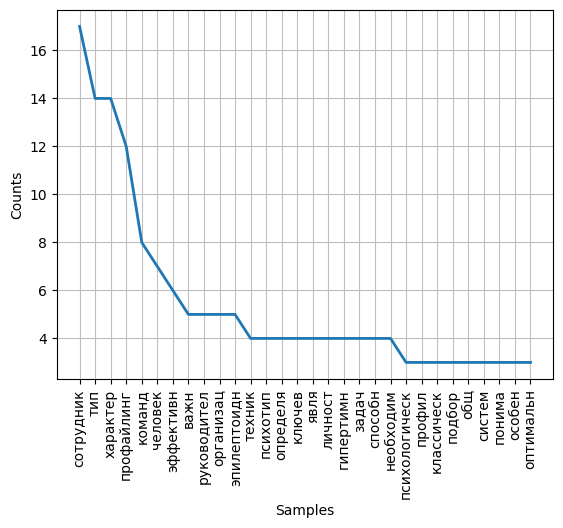

<Axes: xlabel='Samples', ylabel='Counts'>

In [145]:
fdist2 = FreqDist(lemmatized_words2)
fdist2.plot(30,cumulative=False)